# Emotion Detection Project

In [12]:
#importing libraries
import matplotlib.pyplot as plt
import cv2 #for image & video processing
from glob import glob # for maintaining a list of files in the directory
import os
import random
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
'''dense ~ linear fn
input allows the ML model to see the input size
dropout allows the model to work beyond the training dataset
flatten changes matrix to 1D array
conv2D allows us to create convolutional layers to read images
batch normalisation normalises batches of data
activation changes values so that it's not just a linear model
maxpooling2d (filter) changes the dimensions of image so that as convolutional 
layers increase, the data to be processed doesn't increase '''
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model 
'''model helps create/define a model
sequential is a tensorflow model
modelcheckpoint stores data at each iteration while training the model
reduceLRonPlateau is a fn which decreases learning rate 
(spec at the end phase of training when learning rate plteaus)
plot model to plot training losses
svg, image to display images in jupyter notebook'''
from IPython.display import SVG,Image
import tensorflow as tf
print('TensorFlow version: ',tf.__version__)

TensorFlow version:  2.16.1


## Exploring Dataset

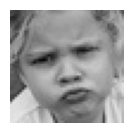

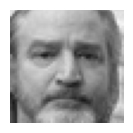

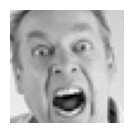

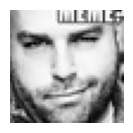

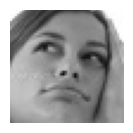

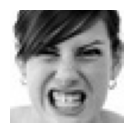

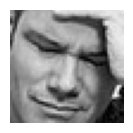

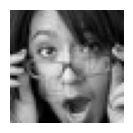

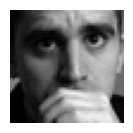

In [13]:
images = glob("fer/train/**/**") #since there are sub-directories labelled with 
#emotions and contain actual pictures that need to be trained on in the 2nd step
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(5,5))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

## Preparing data for training

In [14]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("fer/train/",
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)
datagen_validation = ImageDataGenerator()
validation_generator = datagen_validation.flow_from_directory("fer/test/",
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Defining Model

In [15]:
def Convolution(input_tensor,filters,kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = 'same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)
    return x

In [16]:
def Dense_f(input_tensor,nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x

In [17]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv1 = Convolution(inputs,32,(3,3))
    conv2 = Convolution(inputs,64,(5,5))
    conv3 = Convolution(inputs,128,(3,3))
    flatten = Flatten()(conv3)
    dense_1 = Dense_f(flatten,256)
    output = Dense(7,activation='softmax')(dense_1)
    model = Model(inputs=[inputs],outputs=[output])
    model.compile(loss=['categorical_crossentropy'],optimizer='adam',metrics=['accuracy'])
    return model

In [18]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 48, 48, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 48, 48, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 48, 48, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      18,874,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,879,239 (72.02 MB)

 Trainable params: 18,878,471 (72.02 MB)

 Non-trainable params: 768 (3.00 KB)

## Initializing the Model

In [26]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
checkpoint = ModelCheckpoint("model.weights.h5",monitor="val_acccuracy",save_weights_only=True,mode='max',verbose=1)
callbacks = [checkpoint]

##Training the Model

In [27]:
history = model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

Epoch 1/15


C:\Users\VIAN\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.3268 - loss: 1.8463
Epoch 1: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 242s 519ms/step - accuracy: 0.3269 - loss: 1.8459 - val_accuracy: 0.4099 - val_loss: 1.5469
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:53 388ms/step - accuracy: 0.4062 - loss: 1.5210
Epoch 2: saving model to model.weights.h5


C:\Users\VIAN\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4062 - loss: 1.5210 - val_accuracy: 0.3000 - val_loss: 1.7296
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.4937 - loss: 1.3384
Epoch 3: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 188s 418ms/step - accuracy: 0.4937 - loss: 1.3384 - val_accuracy: 0.4103 - val_loss: 1.5283
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:52 385ms/step - accuracy: 0.3438 - loss: 1.6636
Epoch 4: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3438 - loss: 1.6636 - val_accuracy: 0.3000 - val_loss: 1.6278
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.5713 - loss: 1.1594
Epoch 5: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 177s 394ms/step - accuracy: 0.5713 - loss: 1.1595 - val_accuracy: 0.4295 - val_loss: 1.5136
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:54 391ms/step - accuracy: 0.5156 - loss: 1.2169
Epoch 6: saving model to model.weights.h5


## Model evaluation

In [36]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.4446 - loss: 1.7344


[1.7431589365005493, 0.4437169134616852]

## Plotting Loss

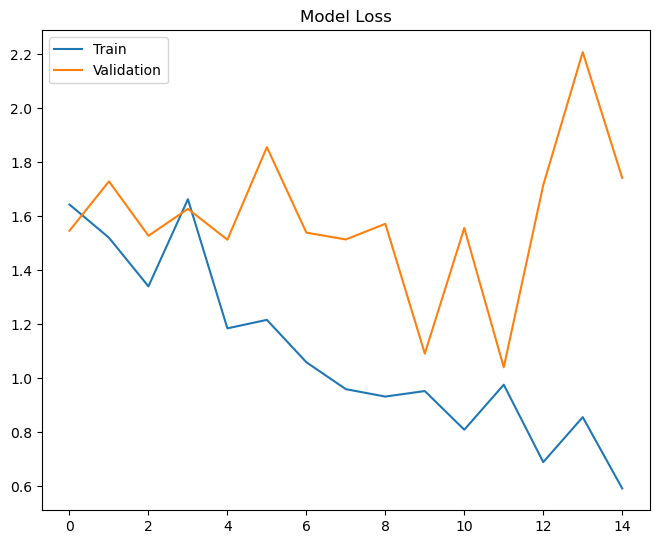

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

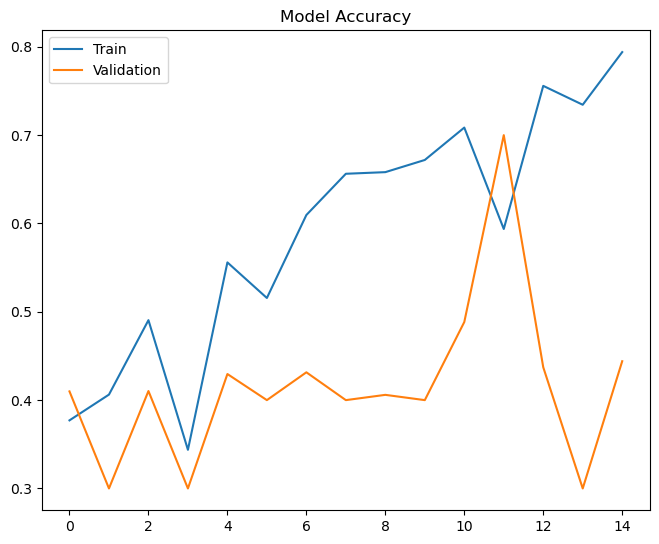

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

## Saving Model

In [32]:
model_json=model.to_json()
with open("model_a.json",'w') as json_file:
          json_file.write(model_json)